In [ ]:
!pip install -U imbalanced-learn

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('audio_features.csv')  

In [ ]:
data.head()

,Track ID,Name,Album,Release Date,Popularity,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
0,5aAx2yezTd8zXrkmtKl66Z,Starboy,Starboy,2016-11-25,0,0.16500,0.681,230453,0.594,0.000003,7,0.1340,-7.028,1,0.2820,186.054,4,0.535
1,1zi7xx7UVEFkmKfv06H8x0,One Dance,Views,2016-05-06,83,0.00776,0.792,173987,0.625,0.001800,1,0.3290,-5.609,1,0.0536,103.967,4,0.370
2,3hB5DgAiMAQ4DzYbsMq1IT,Love Yourself,Purpose (Deluxe),2015-11-13,0,0.83500,0.609,233720,0.378,0.000000,4,0.2800,-9.828,1,0.4380,100.418,4,0.515
3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,Closer,2016-07-29,83,0.41400,0.748,244960,0.524,0.000000,8,0.1110,-5.599,1,0.0338,95.010,4,0.661
4,1MDoll6jK4rrk2BcFRP5i7,Hello,Hello,2015-10-23,1,0.32900,0.471,295502,0.431,0.000000,5,0.0854,-6.129,0,0.0342,157.980,4,0.289


In [ ]:
data['Duration (m)'] = data['Duration (ms)'].div(60000)

In [ ]:
data = data.drop(columns=['Duration (ms)'])

In [ ]:
data.head()

,Track ID,Name,Album,Release Date,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Duration (m)
0,5aAx2yezTd8zXrkmtKl66Z,Starboy,Starboy,2016-11-25,0,0.16500,0.681,0.594,0.000003,7,0.1340,-7.028,1,0.2820,186.054,4,0.535,3.840883
1,1zi7xx7UVEFkmKfv06H8x0,One Dance,Views,2016-05-06,83,0.00776,0.792,0.625,0.001800,1,0.3290,-5.609,1,0.0536,103.967,4,0.370,2.899783
2,3hB5DgAiMAQ4DzYbsMq1IT,Love Yourself,Purpose (Deluxe),2015-11-13,0,0.83500,0.609,0.378,0.000000,4,0.2800,-9.828,1,0.4380,100.418,4,0.515,3.895333
3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,Closer,2016-07-29,83,0.41400,0.748,0.524,0.000000,8,0.1110,-5.599,1,0.0338,95.010,4,0.661,4.082667
4,1MDoll6jK4rrk2BcFRP5i7,Hello,Hello,2015-10-23,1,0.32900,0.471,0.431,0.000000,5,0.0854,-6.129,0,0.0342,157.980,4,0.289,4.925033


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15296 entries, 0 to 15295
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track ID          15296 non-null  object 
 1   Name              15296 non-null  object 
 2   Album             15296 non-null  object 
 3   Release Date      15296 non-null  object 
 4   Popularity        15296 non-null  int64  
 5   Acousticness      15296 non-null  float64
 6   Danceability      15296 non-null  float64
 7   Energy            15296 non-null  float64
 8   Instrumentalness  15296 non-null  float64
 9   Key               15296 non-null  int64  
 10  Liveness          15296 non-null  float64
 11  Loudness          15296 non-null  float64
 12  Mode              15296 non-null  int64  
 13  Speechiness       15296 non-null  float64
 14  Tempo             15296 non-null  float64
 15  Time Signature    15296 non-null  int64  
 16  Valence           15296 non-null  float6

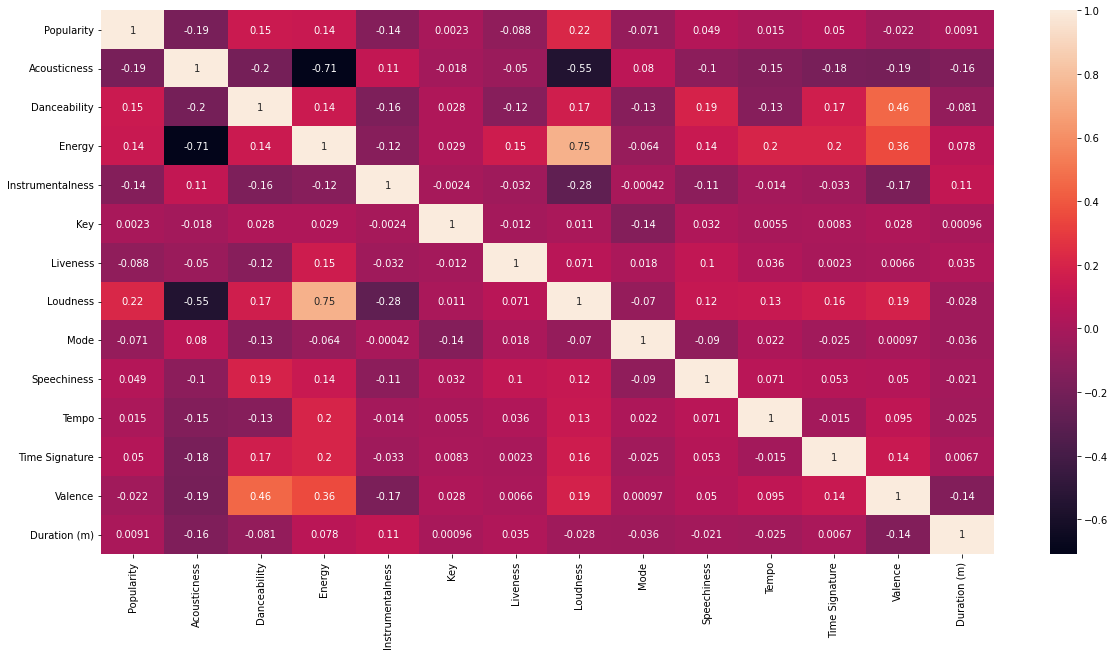

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),annot = True)

Looking at this, I'm interested in loudness, energy, dancability, acoustiness, and instrumentalness the most. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2533f768d0>,
      dtype=object)

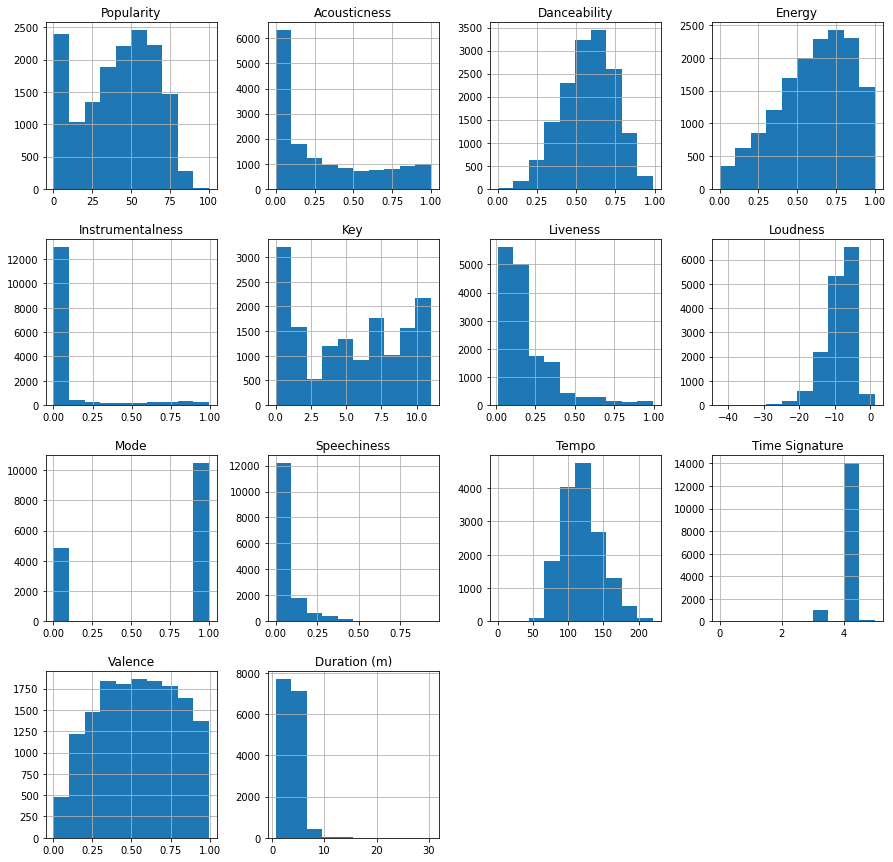

In [ ]:
data.hist(figsize= [15, 15])

From this, I'm interested in Valence as well

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


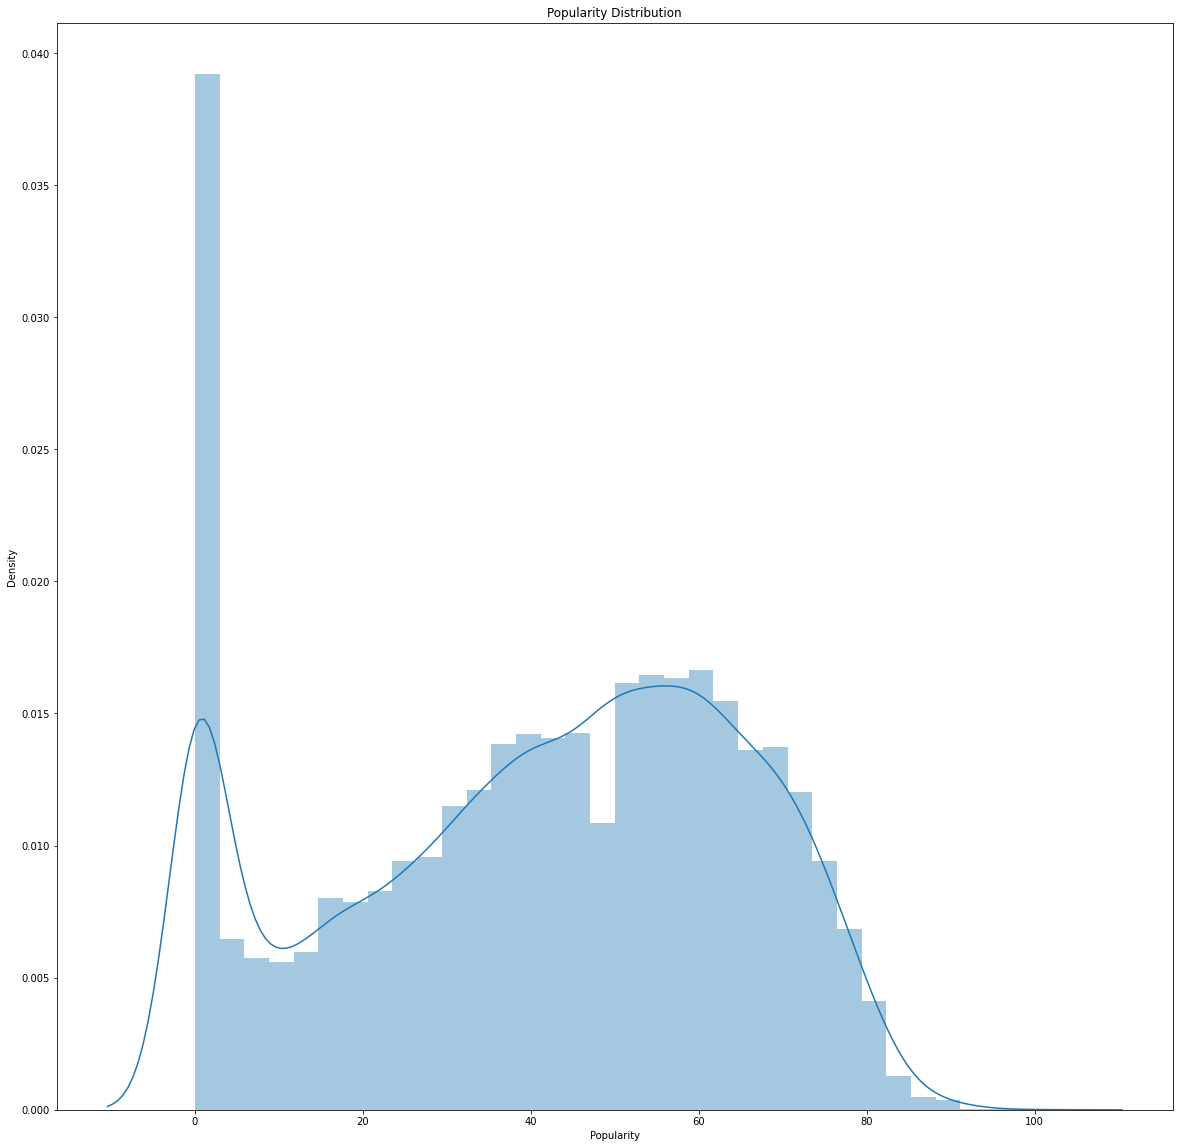

In [ ]:
plt.figure(figsize=(20,20))
sns.distplot(data['Popularity'])
plt.title('Popularity Distribution')
plt.show()

In [ ]:
data.describe()

,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Duration (m)
count,15296.000000,15296.000000,15296.000000,15296.000000,15296.000000,15296.000000,15296.000000,15296.000000,15296.000000,15296.000000,15296.000000,15296.000000,15296.000000,15296.000000
mean,40.888468,0.303899,0.579052,0.611943,0.084309,5.270790,0.196953,-8.622349,0.683774,0.076903,120.214437,3.925798,0.538270,3.812053
std,23.851419,0.317006,0.164773,0.233909,0.220479,3.556065,0.168880,4.161826,0.465018,0.081573,28.207538,0.350107,0.252443,1.324366
min,0.000000,0.000001,0.000000,0.000591,0.000000,0.000000,0.009670,-42.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.638883
25%,23.000000,0.027900,0.466000,0.452000,0.000000,2.000000,0.093700,-10.853000,0.000000,0.034000,99.163000,4.000000,0.335000,3.025504
50%,44.000000,0.171000,0.589000,0.641000,0.000042,5.000000,0.128000,-7.821500,1.000000,0.045300,119.576000,4.000000,0.543000,3.604000
75%,60.000000,0.551000,0.700000,0.802000,0.007208,8.000000,0.252000,-5.603000,1.000000,0.078700,136.906250,4.000000,0.750000,4.283783
max,100.000000,0.996000,0.988000,1.000000,0.993000,11.000000,0.996000,1.342000,1.000000,0.934000,220.113000,5.000000,0.995000,30.358883


# LINEAR REGRESSION

In [ ]:
X = data.drop(columns=['Track ID', 'Name', 'Album', 'Release Date', 'Popularity'])
y = data['Popularity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print(f'X_Train: {X_train.shape}')
print(f'y_Train: {y_train.shape}')
print(f'X_Test: {X_test.shape}')
print(f'y_Test: {y_test.shape}')

X_Train: (12236, 13)
y_Train: (12236,)
X_Test: (3060, 13)
y_Test: (3060,)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import numpy as np

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'Training data Accuracy: {round(lin_reg.score(X_train, y_train)* 100,2)}%')
print(f'Testing data Accuracy: {round(lin_reg.score(X_test, y_test)* 100,2)}%')

MSE: 510.80133819021535
RMSE: 22.60091454322624
Training data Accuracy: 9.72%
Testing data Accuracy: 8.88%


Only using the features that are the most impactful:

In [ ]:
X_new = data[['Loudness', 'Energy', 'Danceability', 'Valence', 'Speechiness', 'Instrumentalness']]
y = data['Popularity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.20)

In [ ]:
print(f'X_Train_new: {X_train_new.shape}')
print(f'y_Train_new: {y_train_new.shape}')
print(f'X_Test_new: {X_test_new.shape}')
print(f'y_Test_new: {y_test_new.shape}')

X_Train_new: (12236, 6)
y_Train_new: (12236,)
X_Test_new: (3060, 6)
y_Test_new: (3060,)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_new,y_train_new)
y_pred_new = lin_reg.predict(X_test_new)

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import numpy as np

print('MSE:', metrics.mean_squared_error(y_test_new, y_pred_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_new, y_pred_new)))
print(f'Training data Accuracy: {round(lin_reg.score(X_train_new, y_train_new)* 100,2)}%')
print(f'Testing data Accuracy: {round(lin_reg.score(X_test_new, y_test_new)* 100,2)}%')

MSE: 521.0644715713443
RMSE: 22.826836652750295
Training data Accuracy: 8.15%
Testing data Accuracy: 7.79%


The main problem here, is that we have so many songs with a popularity index of '0' meaning the data is skewed. Now, I attempt to fix this:

Let's try just removing all the 0 values, as it's not so clear what exactly Spotify means by this

In [ ]:
df_original = data.copy()
data_clean = df_original[df_original['Popularity'] > 0].copy()
data_clean

,Track ID,Name,Album,Release Date,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Duration (m)
1,1zi7xx7UVEFkmKfv06H8x0,One Dance,Views,2016-05-06,83,0.00776,0.792,0.625,0.001800,1,0.3290,-5.609,1,0.0536,103.967,4,0.370,2.899783
3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,Closer,2016-07-29,83,0.41400,0.748,0.524,0.000000,8,0.1110,-5.599,1,0.0338,95.010,4,0.661,4.082667
4,1MDoll6jK4rrk2BcFRP5i7,Hello,Hello,2015-10-23,1,0.32900,0.471,0.431,0.000000,5,0.0854,-6.129,0,0.0342,157.980,4,0.289,4.925033
5,5YEOzOojehCqxGQCcQiyR4,Panda,New English,2016-06-26,70,0.02800,0.576,0.766,0.000002,10,0.3660,-4.943,0,0.4490,144.833,4,0.236,4.112683
7,6b3b7lILUJqXcp6w9wNQSm,Cheap Thrills (feat. Sean Paul),Cheap Thrills (feat. Sean Paul),2016-02-11,67,0.05610,0.592,0.800,0.000002,6,0.0775,-4.931,0,0.2150,89.972,4,0.728,3.746883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15290,1DOgkaR5Gqa8JtPEIbQORC,Over,Over,2021-09-22,78,0.48000,0.677,0.541,0.000000,6,0.1250,-6.057,0,0.0571,103.369,4,0.379,3.421267
15291,2qmWh0uDidLJ8yAlPOtq0g,How Deep Is Your Love,Bridgerton Season Two (Covers from the Netflix...,2022-03-25,67,0.56500,0.225,0.224,0.002080,4,0.0969,-16.583,0,0.0578,89.689,3,0.146,3.773900
15292,2QOB5UiRKggr2j9uMD3GYK,FREEDOM,WE ARE,2021-03-19,66,0.02510,0.873,0.651,0.000107,1,0.2130,-4.179,1,0.0374,115.002,4,0.828,2.971500
15293,2rf9i0Enr8cw1JRME8Rsvq,Cardboard Box,Cardboard Box,2022-03-24,62,0.04000,0.579,0.714,0.000000,1,0.3410,-4.308,1,0.0584,80.419,4,0.696,2.689433


In [ ]:
X_clean = data_clean.drop(columns=['Track ID', 'Name', 'Album', 'Release Date', 'Popularity'])
y_clean = data_clean['Popularity']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


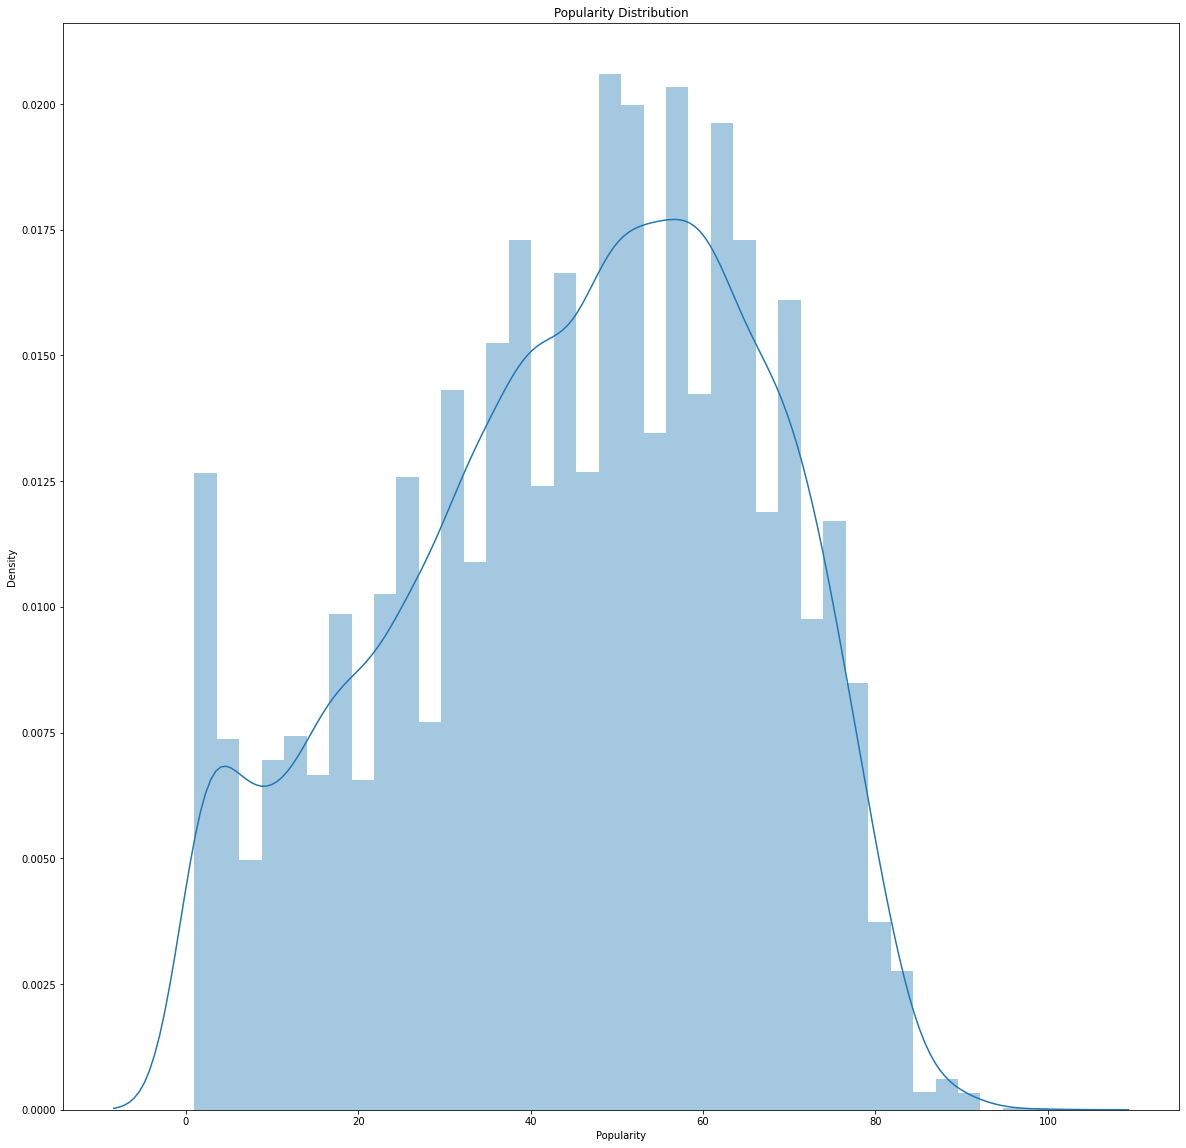

In [ ]:
plt.figure(figsize=(20,20))
sns.distplot(data_clean['Popularity'])
plt.title('Popularity Distribution')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.20)

In [ ]:
print(f'X_Train: {X_train_clean.shape}')
print(f'y_Train: {y_train_clean.shape}')
print(f'X_Test: {X_test_clean.shape}')
print(f'y_Test: {y_test_clean.shape}')

X_Train: (11111, 13)
y_Train: (11111,)
X_Test: (2778, 13)
y_Test: (2778,)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_clean,y_train_clean)
y_pred_clean = lin_reg.predict(X_test_clean)

In [ ]:
print('MSE:', metrics.mean_squared_error(y_test_clean, y_pred_clean))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_clean, y_pred_clean)))
print(f'Training data Accuracy: {round(lin_reg.score(X_train_clean, y_train_clean)* 100,2)}%')
print(f'Testing data Accuracy: {round(lin_reg.score(X_test_clean, y_test_clean)* 100,2)}%')

MSE: 380.64866280282956
RMSE: 19.510219445276096
Training data Accuracy: 13.29%
Testing data Accuracy: 12.16%


In [ ]:
X_clean2 = data_clean[['Loudness', 'Energy', 'Danceability', 'Valence', 'Speechiness', 'Instrumentalness']]
y_clean2 = data_clean['Popularity']

In [ ]:
X_train_clean2, X_test_clean2, y_train_clean2, y_test_clean2 = train_test_split(X_clean2, y_clean2, test_size=0.20)
lin_reg = LinearRegression()
lin_reg.fit(X_train_clean2,y_train_clean2)
y_pred_clean2 = lin_reg.predict(X_test_clean2)
print('MSE:', metrics.mean_squared_error(y_test_clean2, y_pred_clean2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_clean2, y_pred_clean2)))
print(f'Training data Accuracy: {round(lin_reg.score(X_train_clean2, y_train_clean2)* 100,2)}%')
print(f'Testing data Accuracy: {round(lin_reg.score(X_test_clean2, y_test_clean2)* 100,2)}%')

MSE: 395.1740672019795
RMSE: 19.87898556772904
Training data Accuracy: 11.52%
Testing data Accuracy: 9.81%


# LOGISTIC REGRESSION

In [ ]:
cutoff = 70

In [ ]:
df_original0 = data.copy()
df_original = data_clean.copy()

df_original3 = data.copy()

In [ ]:
df_original3 = df_original3.sample(frac=1).reset_index(drop=True)

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

df_original0['popularity_threshold'] = np.where(df_original0['Popularity'] > cutoff, 1, 0)

X_log0 = df_original0.drop(columns=['Track ID', 'Name', 'Album', 'Release Date', 'Popularity', 'popularity_threshold'])
y_log0 = df_original0['popularity_threshold']

X_train, X_test, y_train, y_test = train_test_split(X_log0, y_log0, test_size=0.20)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(X_train, y_train)

score = clf.score(X_train, y_train)
score2 = clf.score(X_test, y_test)
print(f'Training data Accuracy: {round(score * 100,2)}%')
print(f'Testing data Accuracy: {round(score2 * 100,2)}%')

print(f'ROC_AUC_SCORE on Training Data: {round(roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]) * 100,2)}%')
print(f'ROC_AUC_SCORE on Testing Data: {round(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]) * 100,2)}%')

Training data Accuracy: 89.89%
Testing data Accuracy: 89.54%
ROC_AUC_SCORE on Training Data: 75.12%
ROC_AUC_SCORE on Testing Data: 75.52%


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

df_original3['popularity_threshold'] = np.where(df_original3['Popularity'] > cutoff, 1, 0)

X_log0 = df_original3[['Loudness', 'Energy', 'Danceability', 'Speechiness', 'Instrumentalness']]
y_log0 = df_original3['popularity_threshold']

X_train, X_test, y_train, y_test = train_test_split(X_log0, y_log0, test_size=0.20)

from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(penalty='l1', solver='liblinear')
clf.fit(X_train, y_train)

score = clf.score(X_train, y_train)
score2 = clf.score(X_test, y_test)
print(f'Training data Accuracy: {round(score * 100,2)}%')
print(f'Testing data Accuracy: {round(score2 * 100,2)}%')

print(f'ROC_AUC_SCORE on Training Data: {round(roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]) * 100,2)}%')
print(f'ROC_AUC_SCORE on Testing Data: {round(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]) * 100,2)}%')

Training data Accuracy: 89.77%
Testing data Accuracy: 90.07%
ROC_AUC_SCORE on Training Data: 72.0%
ROC_AUC_SCORE on Testing Data: 74.35%


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

df_original3['popularity_threshold'] = np.where(df_original3['Popularity'] > cutoff, 1, 0)

X_log0 = df_original3[['Loudness', 'Energy', 'Danceability', 'Speechiness', 'Instrumentalness']]
y_log0 = df_original3['popularity_threshold']

X_train, X_test, y_train, y_test = train_test_split(X_log0, y_log0, test_size=0.20)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', solver='liblinear', class_weight = 'balanced')
clf.fit(X_train, y_train)

score = clf.score(X_train, y_train)
score2 = clf.score(X_test, y_test)
print(f'Training data Accuracy: {round(score * 100,2)}%')
print(f'Testing data Accuracy: {round(score2 * 100,2)}%')

print(f'ROC_AUC_SCORE on Training Data: {round(roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]) * 100,2)}%')
print(f'ROC_AUC_SCORE on Testing Data: {round(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]) * 100,2)}%')

Training data Accuracy: 62.22%
Testing data Accuracy: 62.35%
ROC_AUC_SCORE on Training Data: 73.04%
ROC_AUC_SCORE on Testing Data: 72.41%


In [ ]:
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
auc_test = metrics.auc(fpr_test, tpr_test)

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, clf.predict_proba(X_train)[:,1])
auc_train = metrics.auc(fpr_train, tpr_train)


In [ ]:
Z = clf.predict(X_test)
df_original3.loc[int(X_log0.shape[0]*0.8):,'predictions']=Z
df_original3.to_csv("Data.csv")

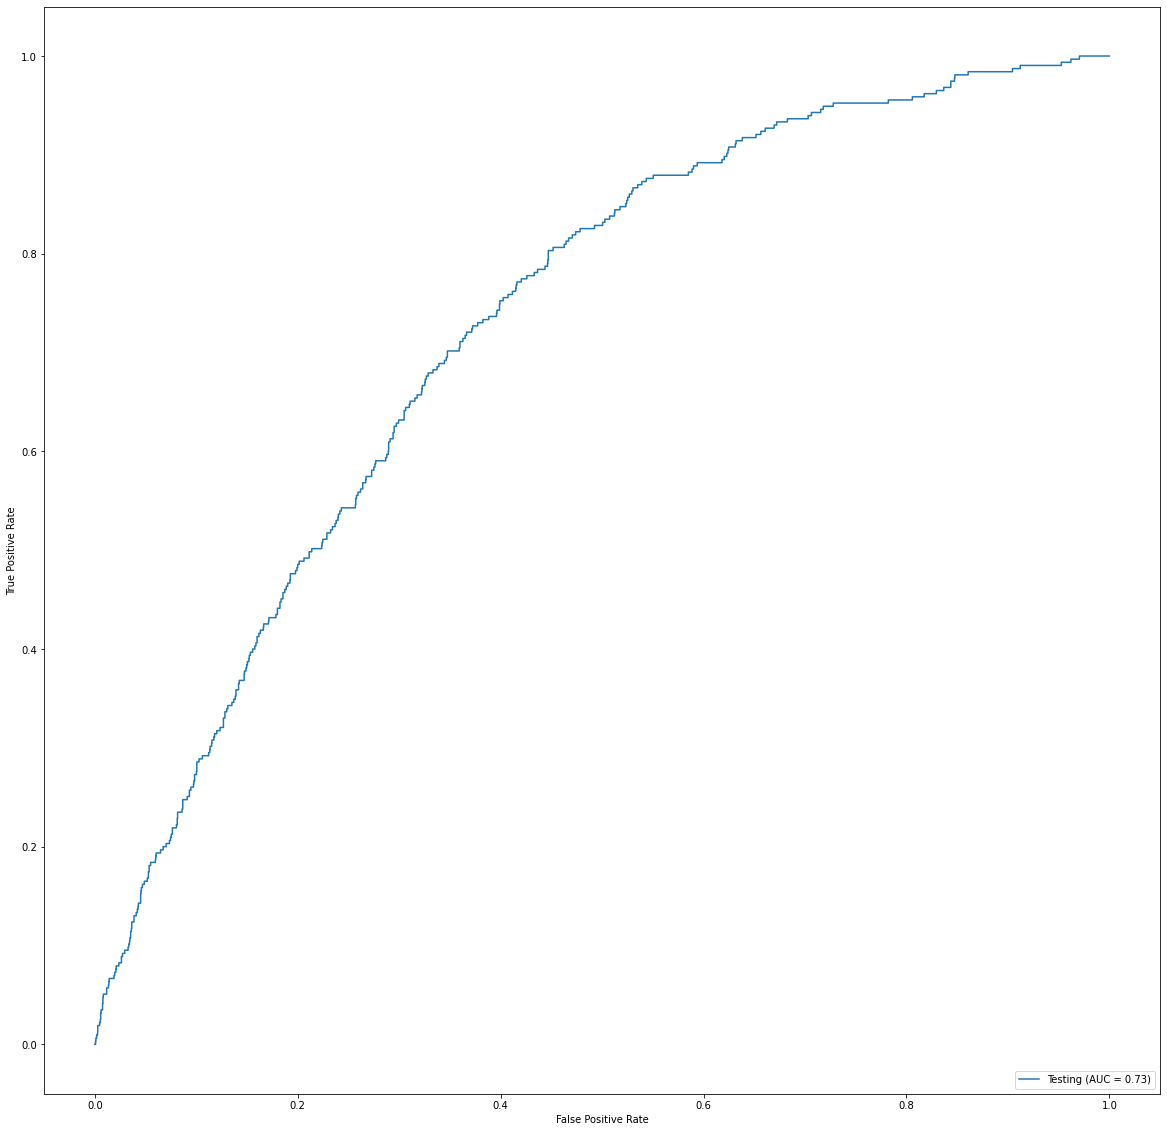

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
display = metrics.RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_test, estimator_name='Testing')
fig, ax = plt.subplots(figsize=(20,20))
display.plot(ax=ax)

In [ ]:
df_original['popularity_threshold'] = np.where(df_original['Popularity'] > cutoff, 1, 0)


In [ ]:
df_original

,Track ID,Name,Album,Release Date,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Duration (m),popularity_threshold
1,1zi7xx7UVEFkmKfv06H8x0,One Dance,Views,2016-05-06,83,0.00776,0.792,0.625,0.001800,1,0.3290,-5.609,1,0.0536,103.967,4,0.370,2.899783,1
3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,Closer,2016-07-29,83,0.41400,0.748,0.524,0.000000,8,0.1110,-5.599,1,0.0338,95.010,4,0.661,4.082667,1
4,1MDoll6jK4rrk2BcFRP5i7,Hello,Hello,2015-10-23,1,0.32900,0.471,0.431,0.000000,5,0.0854,-6.129,0,0.0342,157.980,4,0.289,4.925033,0
5,5YEOzOojehCqxGQCcQiyR4,Panda,New English,2016-06-26,70,0.02800,0.576,0.766,0.000002,10,0.3660,-4.943,0,0.4490,144.833,4,0.236,4.112683,0
7,6b3b7lILUJqXcp6w9wNQSm,Cheap Thrills (feat. Sean Paul),Cheap Thrills (feat. Sean Paul),2016-02-11,67,0.05610,0.592,0.800,0.000002,6,0.0775,-4.931,0,0.2150,89.972,4,0.728,3.746883,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15290,1DOgkaR5Gqa8JtPEIbQORC,Over,Over,2021-09-22,78,0.48000,0.677,0.541,0.000000,6,0.1250,-6.057,0,0.0571,103.369,4,0.379,3.421267,1
15291,2qmWh0uDidLJ8yAlPOtq0g,How Deep Is Your Love,Bridgerton Season Two (Covers from the Netflix...,2022-03-25,67,0.56500,0.225,0.224,0.002080,4,0.0969,-16.583,0,0.0578,89.689,3,0.146,3.773900,0
15292,2QOB5UiRKggr2j9uMD3GYK,FREEDOM,WE ARE,2021-03-19,66,0.02510,0.873,0.651,0.000107,1,0.2130,-4.179,1,0.0374,115.002,4,0.828,2.971500,0
15293,2rf9i0Enr8cw1JRME8Rsvq,Cardboard Box,Cardboard Box,2022-03-24,62,0.04000,0.579,0.714,0.000000,1,0.3410,-4.308,1,0.0584,80.419,4,0.696,2.689433,0


In [ ]:
X_log = df_original.drop(columns=['Track ID', 'Name', 'Album', 'Release Date', 'Popularity', 'popularity_threshold'])
y_log = df_original['popularity_threshold']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.30)

In [ ]:
print(f'X_Train: {X_train_log.shape}')
print(f'y_Train: {y_train_log.shape}')
print(f'X_Test: {X_test_log.shape}')
print(f'y_Test: {y_test_log.shape}')

X_Train: (9722, 13)
y_Train: (9722,)
X_Test: (4167, 13)
y_Test: (4167,)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(X_train_log, y_train_log)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
score = clf.score(X_train_log, y_train_log)
score2 = clf.score(X_test_log, y_test_log)
print(f'Training data Accuracy: {round(score * 100,2)}%')
print(f'Testing data Accuracy: {round(score2 * 100,2)}%')

Training data Accuracy: 88.7%
Testing data Accuracy: 88.86%


In [ ]:
y_pred_train = clf.predict_proba(X_train_log)[:,1]
y_pred_test = clf.predict_proba(X_test_log)[:,1]

In [ ]:
y_test_log


171      1
9365     0
11588    0
12288    0
8039     0
        ..
13130    0
8243     0
10753    0
12171    0
13770    0
Name: popularity_threshold, Length: 4167, dtype: int64

In [ ]:
print(f'ROC_AUC_SCORE on Training Data: {round(roc_auc_score(y_train_log, clf.predict_proba(X_train_log)[:,1]) * 100,2)}%')
print(f'ROC_AUC_SCORE on Testing Data: {round(roc_auc_score(y_test_log, clf.predict_proba(X_test_log)[:,1]) * 100,2)}%')


ROC_AUC_SCORE on Training Data: 75.06%
ROC_AUC_SCORE on Testing Data: 76.25%


In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = metrics.roc_curve(y_test_log, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)

fpr2, tpr2, thresholds = metrics.roc_curve(y_train_log, y_pred_train)
roc_auc2 = metrics.auc(fpr2, tpr2)

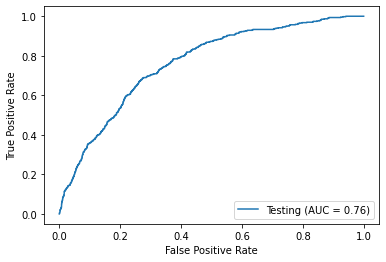

In [ ]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Testing')
display.plot()

# KNN Classifier

In [ ]:
df_original1 = data.copy()
df_original2 = data_clean.copy()

Non-cleaned data:

In [ ]:
X = df_original1.drop(columns=['Track ID', 'Name', 'Album', 'Release Date', 'Popularity'])
y = df_original1['Popularity']

In [ ]:
pd.cut(df_original1['Popularity'], bins=3)
pd.cut(df_original1['Popularity'], bins=3, labels = ['low', 'medium', 'high']).value_counts()

medium    7433
low       5482
high      2381
Name: Popularity, dtype: int64

In [ ]:
df_original1['Popularity'] = pd.cut(df_original1.Popularity, bins=3, labels = ['low', 'medium', 'high'], right = True)

In [ ]:
y = df_original1.Popularity
y.value_counts()/y.count()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(X_ros.shape, y_ros.shape)

In [ ]:
y_ros.value_counts()

In [ ]:
X_ros.value_counts()

In [ ]:
feature_cols = ['Loudness', 'Energy', 'Danceability', 'Valence', 'Speechiness', 'Instrumentalness']
X = data[feature_cols]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=99, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=1) # just try
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_class))

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=3) # log of the number of samples, preventing overfitting
knn2.fit(X_train, y_train)
y_pred_class = knn2.predict(X_test)
print(accuracy_score(y_test, y_pred_class))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np 

cmat = confusion_matrix(y_test, y_pred_class)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_class)}')
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

In [ ]:
cm_display = ConfusionMatrixDisplay(cmat).plot()

Cleaned Data:

In [ ]:
X_clean = df_original2.drop(columns=['Track ID', 'Name', 'Album', 'Release Date', 'Popularity'])
y_clean = df_original2['Popularity']

In [ ]:
pd.cut(df_original2['Popularity'], bins=3)
pd.cut(df_original2['Popularity'], bins=3, labels = ['low', 'medium', 'high']).value_counts()

In [ ]:
df_original2['Popularity'] = pd.cut(df_original2.Popularity, bins=3, labels = ['low', 'medium', 'high'], right = True)

In [ ]:
y_clean = df_original2.Popularity
y_clean.value_counts()/y_clean.count()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros2, y_ros2 = ros.fit_resample(X_clean, y_clean)

print(X_ros2.shape, y_ros2.shape)

In [ ]:
y_ros2.value_counts()

In [ ]:
X_ros2.value_counts()

In [ ]:
feature_cols = ['Loudness', 'Energy', 'Danceability', 'Valence', 'Speechiness', 'Instrumentalness']
X_clean = data[feature_cols]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ros2, y_ros2, random_state=99, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=1) # just try
knn.fit(X_train2, y_train2)
y_pred_class2 = knn.predict(X_test2)
print(accuracy_score(y_test2, y_pred_class2))

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn2.fit(X_train2, y_train2)

In [ ]:
y_pred_class = knn2.predict(X_test2)
print(accuracy_score(y_test2, y_pred_class2))

In [ ]:
y_pred_class2 = knn2.predict(X_train2)
print(accuracy_score(y_train2, y_pred_class2))

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

cmat = confusion_matrix(y_test2, y_pred_class2)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print(f'Accuracy Score: {accuracy_score(y_test2, y_pred_class2)}')
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(cmat)
fig, ax = plt.subplots(figsize=(20,20))
cm_display.plot(ax=ax)